In [2]:
import json

In [3]:
with open('Solar.json', 'r') as f:
    data = json.load(f)

In [6]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [11]:
bounding_box_data = data['boundingBox']
bounding_box_structure = {key: type(value).__name__ for key, value in bounding_box_data.items()}
print(bounding_box_structure)

{'sw': 'dict', 'ne': 'dict'}


In [12]:
sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_structure = {key: type(value).__name__ for key, value in sw_data.items()}
ne_structure = {key: type(value).__name__ for key, value in ne_data.items()}

In [27]:
import folium
import math

# Function to rotate a point
def rotate_point(x, y, angle_degrees, cx, cy):
    angle_radians = math.radians(angle_degrees)
    dx = x - cx
    dy = y - cy
    rotated_dx = dx * math.cos(angle_radians) - dy * math.sin(angle_radians)
    rotated_dy = dx * math.sin(angle_radians) + dy * math.cos(angle_radians)
    return cx + rotated_dx, cy + rotated_dy

# Calculate the midpoint of the bounding box
mid_lat, mid_long = (sw_lat + ne_lat) / 2, (sw_long + ne_long) / 2

# Calculate scaling factor based on latitude
scale_factor = math.cos(math.radians(mid_lat))

# Adjust the deltas based on the scaling factor
scaled_delta_lat = (ne_lat - sw_lat) / scale_factor
scaled_delta_long = ne_long - sw_long

# Calculate the angle of rotation based on the adjusted deltas
angle_degrees = math.degrees(math.atan2(scaled_delta_lat, scaled_delta_long))

# Rotate each corner of the bounding box
rotated_sw = rotate_point(sw_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
rotated_ne = rotate_point(ne_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)
rotated_se = rotate_point(ne_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
rotated_nw = rotate_point(sw_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)

# Rescale the rotated coordinates back to the original scale
rotated_sw = (rotated_sw[0] * scale_factor, rotated_sw[1])
rotated_ne = (rotated_ne[0] * scale_factor, rotated_ne[1])
rotated_se = (rotated_se[0] * scale_factor, rotated_se[1])
rotated_nw = (rotated_nw[0] * scale_factor, rotated_nw[1])

# Initialize the folium map centered around the bounding box
zoom_level = 6  # Adjust as needed
m = folium.Map(location=[mid_lat, mid_long], zoom_start=zoom_level)

# Draw the rotated bounding box as a polygon
folium.Polygon([rotated_sw, rotated_se, rotated_ne, rotated_nw, rotated_sw], 
               color='red').add_to(m)

# Show the map
m


In [23]:
import folium



# Calculate the mid-point of the bounding box
mid_lat, mid_long = (sw_lat + ne_lat) / 2, (sw_long + ne_long) / 2

# Initialize the folium map centered around the bounding box
# Set zoom level dynamically based on bounding box dimensions
lat_diff = abs(ne_lat - sw_lat)
long_diff = abs(ne_long - sw_long)
zoom_level = int(10 - (lat_diff + long_diff) / 2)

m = folium.Map(location=[mid_lat, mid_long], zoom_start=zoom_level)

# Draw bounding box as a polygon
folium.Polygon([(sw_lat, sw_long), (sw_lat, ne_long), (ne_lat, ne_long), (ne_lat, sw_long), (sw_lat, sw_long)], 
               color='red').add_to(m)

# Show map
m


In [33]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [38]:
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}
print(solarPotential_structure)

{'maxArrayPanelsCount': 'int', 'maxArrayAreaMeters2': 'float', 'maxSunshineHoursPerYear': 'int', 'carbonOffsetFactorKgPerMwh': 'float', 'wholeRoofStats': 'dict', 'roofSegmentStats': 'list', 'solarPanelConfigs': 'list', 'financialAnalyses': 'list', 'panelCapacityWatts': 'int', 'panelHeightMeters': 'float', 'panelWidthMeters': 'float', 'panelLifetimeYears': 'int', 'buildingStats': 'dict', 'solarPanels': 'list'}


In [39]:
def explore_nested_dict(d, indent=0, max_samples=3):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)


Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'int'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 352
    Sample 2: 708
    Sample 3: 876
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 5
  Sample 1: {'pitchDegrees': 6.224868, 'azimuthDegrees': 53.74429, 'stats': {'areaMeters2': 46.866325, 'sunshineQuantiles': [352, 567, 834, 867, 888, 910, 935, 956, 976, 992, 1034], 'groundAreaMeters2': 46.59}, 'center': {'latitude': 42.2507849, 'longitude': -70.97850559999999}, 'boundingBox': {'sw': {'latitude': 42.2507291, 'longitude': -70.9785879}, 'ne': {'latitude': 42.2508397, 'longitude': -70.9784355}}, 'planeHeightAtCenterMeters': 8.7207

In [43]:


# Access the 'solarPanelConfigs' list
solar_panel_configs = solarPotential_data.get('solarPanelConfigs', [])

# Loop through each configuration and print it
for i, config in enumerate(solar_panel_configs):
    print(f"Panel Config {i+1}: {config}")


Panel Config 1: {'panelsCount': 4, 'yearlyEnergyDcKwh': 1392.345, 'roofSegmentSummaries': [{'pitchDegrees': 32.223267, 'azimuthDegrees': 138.11284, 'panelsCount': 2, 'yearlyEnergyDcKwh': 698.6982, 'segmentIndex': 3}, {'pitchDegrees': 30.376875, 'azimuthDegrees': 227.45377, 'panelsCount': 2, 'yearlyEnergyDcKwh': 693.6468, 'segmentIndex': 4}]}
Panel Config 2: {'panelsCount': 5, 'yearlyEnergyDcKwh': 1733.5128, 'roofSegmentSummaries': [{'pitchDegrees': 32.223267, 'azimuthDegrees': 138.11284, 'panelsCount': 3, 'yearlyEnergyDcKwh': 1039.8661, 'segmentIndex': 3}, {'pitchDegrees': 30.376875, 'azimuthDegrees': 227.45377, 'panelsCount': 2, 'yearlyEnergyDcKwh': 693.6468, 'segmentIndex': 4}]}
Panel Config 3: {'panelsCount': 6, 'yearlyEnergyDcKwh': 2073.0344, 'roofSegmentSummaries': [{'pitchDegrees': 32.223267, 'azimuthDegrees': 138.11284, 'panelsCount': 4, 'yearlyEnergyDcKwh': 1379.3877, 'segmentIndex': 3}, {'pitchDegrees': 30.376875, 'azimuthDegrees': 227.45377, 'panelsCount': 2, 'yearlyEnergyDcK

In [45]:
# Code to explore all entries under 'financialAnalyses'
def explore_financialAnalyses(financialAnalyses_list):
    # Initialize an empty list to store the structures of each entry
    all_structures = []
    
    # Loop through each entry in 'financialAnalyses'
    for i, entry in enumerate(financialAnalyses_list):
        # Extract the structure of the current entry
        current_structure = {key: type(value).__name__ for key, value in entry.items()}
        
        # Append the current structure to the list of all structures
        all_structures.append(current_structure)
    
    return all_structures

# Extract the 'financialAnalyses' list from the 'solarPotential' data
financialAnalyses_list = solarPotential_data['financialAnalyses']

# Get the structures of all entries under 'financialAnalyses'
all_financialAnalyses_structures = explore_financialAnalyses(financialAnalyses_list)
all_financialAnalyses_structures[:5]  # Displaying the first 5 entries for illustration


[{'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'}]

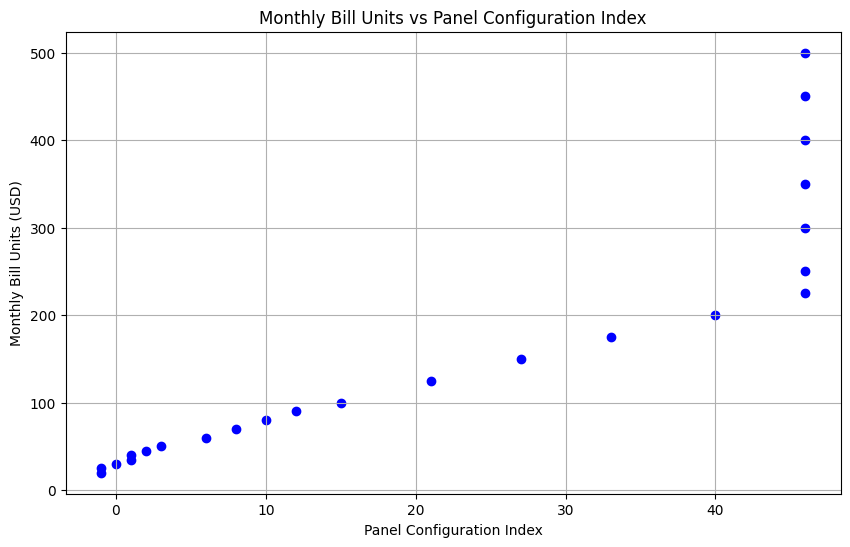

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

financialAnalyses_data = solarPotential_data['financialAnalyses']
# Convert the list of financial analyses to a DataFrame
financial_df = pd.DataFrame(financialAnalyses_data)

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Extracting the 'units' from 'monthlyBill' and 'panelConfigIndex' for all entries
monthlyBill_units = [float(item['monthlyBill']['units']) for item in financialAnalyses_data]
panelConfigIndex_values = [item['panelConfigIndex'] for item in financialAnalyses_data]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(panelConfigIndex_values, monthlyBill_units, marker='o', color='b')
plt.title('Monthly Bill Units vs Panel Configuration Index')
plt.xlabel('Panel Configuration Index')
plt.ylabel('Monthly Bill Units (USD)')
plt.grid(True)
plt.show()